In [1]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from pandas_datareader import data
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm
import pyfolio as pf
%matplotlib inline

C:\Users\LAVANYA MARAN\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
import csv
df = pd.read_csv('Final_stock_data_V2.csv')
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
1,ABT,Abbott Laboratories,Healthcare,Increase,Above Fair Price,OverValued,Average,118.2900,0.181179,2.091710e+11,...,0.74,3.940,0.1318,22.924420,30.022842,51.234756,25.96,0.109154,0.249769,0.247649
2,ACN,Accenture plc,Technology,Increase,Above Fair Price,OverValued,Sustainable,323.9050,0.208836,2.047083e+11,...,1.21,9.613,0.1135,31.025385,33.694477,121.148794,9.45,0.166287,0.254874,0.245322
3,ADM,Archer-Daniels-Midland Company,Consumer Defensive,Increase,Above Fair Price,OverValued,Not Sustainable,76.9850,0.122815,4.327843e+10,...,0.81,4.790,0.0660,14.804809,16.072025,19.449588,36.42,0.117663,0.252289,0.150693
4,ADP,"Automatic Data Processing, Inc.",Industrials,Increase,Above Fair Price,OverValued,Sustainable,201.0100,0.182708,8.443324e+10,...,0.83,6.460,0.1371,26.483530,31.116098,90.801919,14.18,0.120094,0.272415,0.178939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
934,ZD,"Ziff Davis, Inc.",Communication Services,Increase,Above Fair Price,OverValued,No Data,102.4800,0.145864,4.941668e+09,...,1.01,4.120,0.1140,14.193907,24.873789,38.485339,999.00,0.141975,0.308007,0.055993
935,ZUMZ,Zumiez Inc.,Consumer Cyclical,Decrease,Above Fair Price,UnderValued,No Data,42.6600,0.035214,9.777245e+08,...,1.68,4.870,0.1500,9.233767,8.759754,21.330001,999.00,0.223419,0.513665,0.157523
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


<AxesSubplot:>

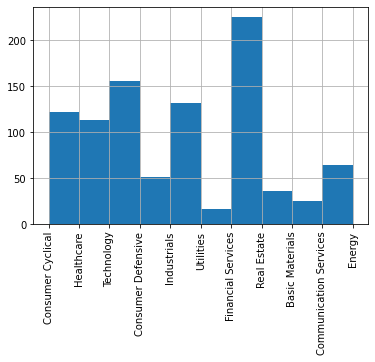

In [3]:
df['sector'].hist(xrot=90)

## Filter based on 2/3 criteria

In [4]:
def check_criteria(each):
    check = []
    if each["capm_status"] == "UnderValued":
        check.append(True)
    if each["Earnings_expectation"] == "Increase":
        check.append(True)
    if each["irv_status"] == "Below Fair Price":
        check.append(True)
    return check

In [5]:
def check_number(criteria):
    if len(criteria) >= 2:
        return True
    else:
        return False

In [6]:
rows = []
for i in range(938):
    each = df.iloc[i]
    criteria = check_criteria(each)
    result = check_number(criteria)
    if result:
        rows.append(i)

In [7]:
len(rows)

476

In [8]:
df = df.iloc[rows]
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,1.43,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161
11,ALK,"Alaska Air Group, Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,58.9750,0.141697,7.425660e+09,...,1.55,3.770,-0.2340,9.073076,15.643236,0.761055,999.00,0.207617,0.454054,-0.086043
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,1.14,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,1.95,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,XOMA,XOMA Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,20.7600,-0.034853,2.348205e+08,...,0.81,0.082,0.1900,-90.260870,253.170730,14.120154,999.00,0.117663,0.689078,0.371572
932,XP,XP Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,34.1100,-0.001020,1.908622e+10,...,1.91,0.986,0.0478,27.508064,34.594322,7.380346,999.00,0.251378,NaN,NaN
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


In [9]:
#total number of stocks for each sector 

df["sector"].value_counts()

Industrials               93
Technology                89
Consumer Cyclical         79
Financial Services        68
Healthcare                52
Communication Services    29
Basic Materials           20
Consumer Defensive        19
Energy                    15
Real Estate               11
Utilities                  1
Name: sector, dtype: int64

In [10]:
#df for each sector

df_basic_materials = df.loc[df['sector'] == 'Basic Materials']
df_communication = df.loc[df['sector'] == 'Communication Services']
df_consumer_c = df.loc[df['sector'] == 'Consumer Cyclical']
df_consumer_d = df.loc[df['sector'] == 'Consumer Defensive']
df_energy = df.loc[df['sector'] == 'Energy']
df_financial = df.loc[df['sector'] == 'Financial Services']
df_healthcare = df.loc[df['sector'] == 'Healthcare']
df_industrials = df.loc[df['sector'] == 'Industrials']
df_real_estate = df.loc[df['sector'] == 'Real Estate']
df_tech = df.loc[df['sector'] == 'Technology']
df_utilites = df.loc[df['sector'] == 'Utilities']

In [26]:
#sectors used in aggressive model: tech, healthcare, real estate, industrials, consumer cyclical

# Tech Sector

## Filtering Stocks based on Sharpe Ratio

In [12]:
def get_closeprice(ticker):    
    start_date = str(date.today().year - 5) +'-0'+ str(date.today().month) +'-'+ str(date.today().day)
    end_date = str(date.today())
    
    panel_data = data.DataReader([ticker],'yahoo', start_date, end_date)
    closes = panel_data[["Close", "Adj Close"]]
    
    return closes

In [13]:
def get_sharpe_ratio(ticker):
    
    closes = get_closeprice(ticker)
    adj_close = closes["Adj Close"]
    
    risk_free_ann_ret_rate = 0.0195  #assuming this rate based on the latest data
     
    #Rp
    returns_ts = adj_close.pct_change().dropna()
    
    #Average Rp
    avg_daily_ret = returns_ts.mean()

    #Average risk-free rate for the year (Annual rate / number of trading days to spread it out)
    returns_ts['RiskFree_Rate'] = risk_free_ann_ret_rate/252

    #Average Rf
    avg_rf_ret = returns_ts['RiskFree_Rate'].mean()

    #calculate sharpe ratio

    #Add the excess return columns for each ETF: Rp - Rf
    returns_ts['Excess_ret'] = returns_ts[ticker] - returns_ts['RiskFree_Rate']
    
    sharpe = ((avg_daily_ret[ticker] - avg_rf_ret) /returns_ts['Excess_ret'].std())*np.sqrt(252)

    return sharpe.round(3)

In [14]:
sharpe_list = []
for i in range(len(df_tech)):
    each = df_tech.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [15]:
sharpe_list

[0.6,
 0.997,
 0.757,
 0.422,
 0.829,
 0.376,
 0.165,
 0.425,
 0.614,
 0.54,
 0.528,
 0.737,
 0.463,
 0.065,
 0.199,
 0.512,
 0.682,
 1.37,
 1.049,
 0.086,
 0.48,
 0.841,
 0.143,
 0.367,
 0.179,
 0.467,
 0.283,
 -0.313,
 0.278,
 0.463,
 0.534,
 0.376,
 0.284,
 0.401,
 -0.256,
 0.435,
 0.807,
 0.898,
 0.181,
 -0.089,
 0.485,
 0.365,
 -0.011,
 0.084,
 0.398,
 0.493,
 0.461,
 0.093,
 0.558,
 0.671,
 0.113,
 0.683,
 0.667,
 0.543,
 0.546,
 0.534,
 0.372,
 0.302,
 0.652,
 0.03,
 0.038,
 0.143,
 0.085,
 0.482,
 0.764,
 0.211,
 0.291,
 -0.001,
 0.383,
 0.337,
 0.708,
 0.422,
 0.583,
 0.899,
 0.62,
 0.168,
 0.119,
 0.723,
 1.805,
 0.426,
 0.499,
 0.511,
 1.128,
 0.605,
 -0.082,
 0.041,
 0.695,
 0.025,
 0.071]

In [16]:
df_tech["sharpe"] = sharpe_list
df_tech

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_15020/505389931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tech["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161,0.600
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607,0.997
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663,0.757
57,CTSH,Cognizant Technology Solutions,Technology,Increase,Above Fair Price,UnderValued,Sustainable,85.7600,0.098598,4.556764e+10,...,3.545,0.1398,18.973452,24.191820,39.576018,17.47,0.156562,0.290279,0.115536,0.422
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,7.211,0.2850,38.391674,59.469560,582.247739,999.00,0.193030,0.376405,0.422642,0.829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,UEIC,Universal Electronics Inc.,Technology,Increase,Above Fair Price,UnderValued,No Data,32.0000,0.045029,4.192544e+08,...,1.707,0.1500,9.090909,18.746338,15.999999,999.00,0.162640,0.491506,-0.118525,-0.082
919,VSAT,"ViaSat, Inc.",Technology,Increase,Below Fair Price,UnderValued,No Data,41.2500,-0.011116,3.029557e+09,...,0.478,0.2460,85.937500,86.297070,42.440039,999.00,0.155346,0.431753,-0.081127,0.041
923,WDAY,"Workday, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,216.5600,0.160951,5.414000e+10,...,0.117,0.1579,60.831463,1850.940200,115.161464,13.09,0.183305,0.383779,0.213788,0.695
928,WTRH,Waitr Holdings Inc.,Technology,Increase,Above Fair Price,UnderValued,No Data,0.4474,-0.264822,6.456787e+07,...,0.043,0.2000,-5.592500,10.404651,0.328108,999.00,-0.137611,1.128303,-0.461342,0.025


In [17]:
df2_tech = df_tech[df_tech["sharpe"] > 0.6]
df2_tech

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607,0.997
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663,0.757
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,7.211,0.2850,38.391674,59.469560,582.247739,999.00,0.193030,0.376405,0.422642,0.829
155,NTAP,"NetApp, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,88.2150,0.095312,1.960825e+10,...,4.113,0.0880,16.009981,21.447847,26.785016,16.58,0.166287,0.373202,0.185306,0.614
176,QCOM,QUALCOMM Incorporated,Technology,Increase,Below Fair Price,UnderValued,Sustainable,165.6500,0.130769,1.855280e+11,...,7.870,0.2562,14.231099,21.048285,183.404501,18.00,0.173580,0.375961,0.297623,0.737
243,AOSL,Alpha and Omega Semiconductor L,Technology,Increase,Above Fair Price,UnderValued,No Data,49.2600,0.165397,1.299356e+09,...,2.612,0.1700,11.617925,18.859112,28.764485,999.00,0.330391,0.570794,0.201750,0.682
244,APPS,"Digital Turbine, Inc.",Technology,Increase,Below Fair Price,UnderValued,No Data,43.8000,0.278657,4.232205e+09,...,0.530,0.5000,20.372091,82.641510,239.323247,999.00,0.285415,0.719036,1.325025,1.370
249,ASML,ASML Holding N.V. - New York Re,Technology,Increase,Below Fair Price,OverValued,No Data,634.7900,0.341963,2.580256e+11,...,15.017,0.2980,32.420326,42.271423,943.608234,999.00,0.134681,0.360669,0.411064,1.049
258,AUDC,AudioCodes Ltd.,Technology,Increase,Below Fair Price,OverValued,No Data,27.6750,0.234188,9.141052e+08,...,1.028,0.2500,16.875000,26.921206,29.306718,999.00,0.084842,0.446357,0.362672,0.841
381,DIOD,Diodes Incorporated,Technology,Increase,Above Fair Price,UnderValued,No Data,87.1300,0.131229,3.922401e+09,...,4.123,0.1500,14.919519,21.132670,43.564999,999.00,0.148053,0.401822,0.286506,0.807


## Correlation between Stocks

In [18]:
def get_return_series(ticker):
    closes = get_closeprice(ticker)
    return_series_close = (closes['Close'].pct_change()+ 1).cumprod() - 1
    return return_series_close

In [26]:
returns_list = []
for i in range(len(df2_tech)):
    each = df2_tech.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260):
        returns_list.append(returns)

In [27]:
returns_list

[Symbols          AMD
 Date                
 2017-03-23       NaN
 2017-03-24 -0.006526
 2017-03-27 -0.006526
 2017-03-28 -0.007252
 2017-03-29 -0.005801
 ...              ...
 2022-03-17  7.099348
 2022-03-18  7.227701
 2022-03-21  7.406091
 2022-03-22  7.323423
 2022-03-23  7.261059
 
 [1260 rows x 1 columns],
 Symbols         ANSS
 Date                
 2017-03-23       NaN
 2017-03-24 -0.008350
 2017-03-27 -0.008819
 2017-03-28 -0.003753
 2017-03-29 -0.000375
 ...              ...
 2022-03-17  1.904869
 2022-03-18  1.989024
 2022-03-21  1.914439
 2022-03-22  1.977672
 2022-03-23  1.874848
 
 [1260 rows x 1 columns],
 Symbols         EPAM
 Date                
 2017-03-23       NaN
 2017-03-24  0.005627
 2017-03-27  0.012627
 2017-03-28  0.023881
 2017-03-29  0.034450
 ...              ...
 2022-03-17  2.749520
 2022-03-18  3.041587
 2022-03-21  2.898572
 2022-03-22  3.166072
 2022-03-23  3.208756
 
 [1260 rows x 1 columns],
 Symbols             NTAP
 Date                    
 2017-

In [28]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,AMD,ANSS,EPAM,NTAP,QCOM,AOSL,APPS,ASML,AUDC,DIOD,...,MANT,MGIC,NSIT,ON,POWI,RIOT,RMBS,TTD,UCTT,WDAY
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-24,-0.006526,-0.008350,0.005627,-4.890087e-04,0.001936,-0.008149,-0.031579,0.023371,-0.005848,0.012648,...,-0.013009,0.025478,-0.006031,0.014706,0.006260,0.012012,0.009360,-0.027012,0.018205,0.018166
2017-03-27,-0.006526,-0.008819,0.012627,-1.110223e-16,-0.002640,-0.004657,-0.042105,0.026931,0.001462,0.004637,...,-0.024039,0.012739,-0.003860,0.003342,0.005477,0.045045,0.007800,0.005402,0.017555,0.017798
2017-03-28,-0.007252,-0.003753,0.023881,6.112469e-03,0.010033,-0.008149,-0.073684,0.035366,0.013158,-0.000843,...,-0.021210,0.006369,-0.015682,0.022059,0.017214,0.054054,0.010920,-0.014317,0.017555,0.027740
2017-03-29,-0.005801,-0.000375,0.034450,1.687038e-02,0.009681,0.006403,-0.010526,0.028556,0.010234,0.002530,...,-0.013009,0.006369,-0.010133,0.014706,0.012519,0.205105,0.007800,0.025932,0.031209,0.038174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-17,7.099348,1.904869,2.749520,1.112714e+00,1.690195,2.279977,41.873684,4.061910,2.953216,2.756324,...,1.498303,1.332484,1.602895,3.061497,1.923944,4.534535,1.311232,16.668829,1.871911,1.888180
2022-03-18,7.227701,1.989024,3.041587,1.192910e+00,1.710614,2.362049,44.305265,4.261260,2.973684,2.860034,...,1.394231,1.368153,1.618094,3.139706,2.036307,4.864865,1.436037,17.587250,1.910923,1.990058
2022-03-21,7.406091,1.914439,2.898572,1.163814e+00,1.738778,2.314319,43.115790,4.284863,2.982456,2.819140,...,1.454751,1.340128,1.639083,3.139706,1.975900,4.891892,1.434477,17.087520,1.824447,1.980729


<AxesSubplot:xlabel='Date'>

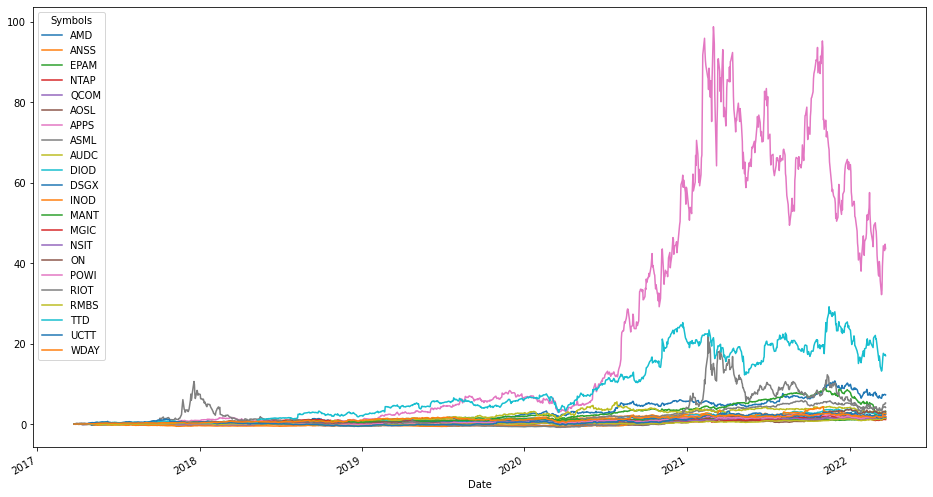

In [29]:
return_series_close.plot(figsize=(16,9))

In [30]:
highest = return_series_close[return_series_close.tail(1) > 5]

In [31]:
highest.dropna(axis=1, how="all")

Symbols,AMD,APPS,RIOT,TTD
Date,,,,
2017-03-23,NaN,NaN,NaN,NaN
2017-03-24,NaN,NaN,NaN,NaN
2017-03-27,NaN,NaN,NaN,NaN
2017-03-28,NaN,NaN,NaN,NaN
2017-03-29,NaN,NaN,NaN,NaN
...,...,...,...,...
2022-03-17,NaN,NaN,NaN,NaN
2022-03-18,NaN,NaN,NaN,NaN
2022-03-21,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

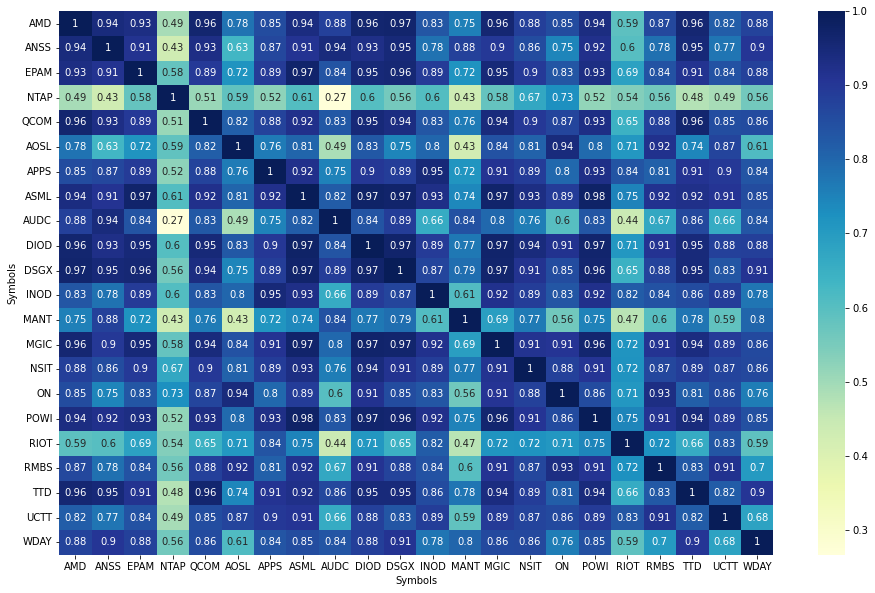

In [32]:
correlation = return_series_close.corr()
# correlation
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [33]:
correlation = correlation[correlation < 0.1]
correlation

Symbols,AMD,ANSS,EPAM,NTAP,QCOM,AOSL,APPS,ASML,AUDC,DIOD,...,MANT,MGIC,NSIT,ON,POWI,RIOT,RMBS,TTD,UCTT,WDAY
Symbols,,,,,,,,,,,,,,,,,,,,,
AMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EPAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NTAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QCOM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AOSL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
APPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUDC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Final DF for Tech

In [34]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [35]:
indexes = []
for i in range(len(df2_tech)):
    each = df2_tech.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [36]:
chosen_tech_df = df2_tech.iloc[indexes]
chosen_tech_df #22 stocks for tech sector

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607,0.997
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663,0.757
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,7.211,0.2850,38.391674,59.469560,582.247739,999.00,0.193030,0.376405,0.422642,0.829
155,NTAP,"NetApp, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,88.2150,0.095312,1.960825e+10,...,4.113,0.0880,16.009981,21.447847,26.785016,16.58,0.166287,0.373202,0.185306,0.614
176,QCOM,QUALCOMM Incorporated,Technology,Increase,Below Fair Price,UnderValued,Sustainable,165.6500,0.130769,1.855280e+11,...,7.870,0.2562,14.231099,21.048285,183.404501,18.00,0.173580,0.375961,0.297623,0.737
243,AOSL,Alpha and Omega Semiconductor L,Technology,Increase,Above Fair Price,UnderValued,No Data,49.2600,0.165397,1.299356e+09,...,2.612,0.1700,11.617925,18.859112,28.764485,999.00,0.330391,0.570794,0.201750,0.682
244,APPS,"Digital Turbine, Inc.",Technology,Increase,Below Fair Price,UnderValued,No Data,43.8000,0.278657,4.232205e+09,...,0.530,0.5000,20.372091,82.641510,239.323247,999.00,0.285415,0.719036,1.325025,1.370
249,ASML,ASML Holding N.V. - New York Re,Technology,Increase,Below Fair Price,OverValued,No Data,634.7900,0.341963,2.580256e+11,...,15.017,0.2980,32.420326,42.271423,943.608234,999.00,0.134681,0.360669,0.411064,1.049
258,AUDC,AudioCodes Ltd.,Technology,Increase,Below Fair Price,OverValued,No Data,27.6750,0.234188,9.141052e+08,...,1.028,0.2500,16.875000,26.921206,29.306718,999.00,0.084842,0.446357,0.362672,0.841
381,DIOD,Diodes Incorporated,Technology,Increase,Above Fair Price,UnderValued,No Data,87.1300,0.131229,3.922401e+09,...,4.123,0.1500,14.919519,21.132670,43.564999,999.00,0.148053,0.401822,0.286506,0.807


# Healthcare Sector

## Filtering Stocks based on Sharpe Ratio

In [37]:
sharpe_list = []
for i in range(len(df_healthcare)):
    each = df_healthcare.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [38]:
sharpe_list

[0.07,
 0.859,
 0.903,
 0.779,
 -0.158,
 -0.014,
 -0.029,
 0.379,
 0.609,
 -0.071,
 0.108,
 0.73,
 0.426,
 0.834,
 -0.002,
 0.403,
 0.268,
 0.683,
 0.582,
 0.542,
 0.589,
 0.06,
 0.218,
 0.429,
 0.332,
 0.081,
 0.346,
 0.824,
 -0.068,
 1.229,
 0.117,
 0.079,
 0.938,
 0.644,
 0.344,
 0.721,
 1.132,
 0.392,
 0.06,
 0.385,
 0.071,
 0.982,
 0.199,
 0.419,
 0.935,
 0.175,
 0.541,
 0.335,
 0.431,
 0.445,
 0.918,
 0.732]

In [39]:
df_healthcare["sharpe"] = sharpe_list
df_healthcare

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_15020/4048192744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_healthcare["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
30,BIIB,Biogen Inc.,Healthcare,Increase,Above Fair Price,UnderValued,Not Sustainable,210.0000,0.060577,3.084753e+10,...,10.2170,-0.0650,11.332973,20.553978,1.630096e+01,20.62,0.072686,0.458651,-0.051561,0.070
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.6100,0.171804,1.670966e+10,...,3.1770,0.1617,23.240477,30.723953,5.346009e+01,999.00,0.182089,0.359504,0.285814,0.859
102,IDXX,"IDEXX Laboratories, Inc.",Healthcare,Increase,Below Fair Price,OverValued,Not Sustainable,489.5600,0.272290,4.151156e+10,...,8.7180,0.2430,52.025505,56.155080,4.928736e+02,20.74,0.133466,0.305168,0.291234,0.903
106,IQV,"IQVIA Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,226.1600,0.183066,4.320561e+10,...,3.9290,0.2213,22.281775,57.561720,1.943151e+02,19.24,0.189383,0.301323,0.240998,0.779
212,WBA,"Walgreens Boots Alliance, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,46.1800,0.056427,3.989698e+10,...,2.9330,0.0293,9.054902,15.744970,8.511794e+00,18.38,0.086058,0.316630,-0.084159,-0.158
218,XRAY,DENTSPLY SIRONA Inc.,Healthcare,Increase,Below Fair Price,UnderValued,Not Sustainable,55.1800,0.044138,1.206273e+10,...,1.9020,0.2497,17.297806,29.011568,5.830732e+01,20.12,0.129819,0.322027,0.004033,-0.014
230,AGIO,"Agios Pharmaceuticals, Inc.",Healthcare,Increase,Below Fair Price,UnderValued,No Data,29.0000,-0.007540,1.574947e+09,...,24.9500,0.3900,-4.769737,1.162325,7.984002e+01,999.00,0.201539,0.510859,-0.078755,-0.029
255,ATRS,"Antares Pharma, Inc.",Healthcare,Decrease,Below Fair Price,UnderValued,No Data,3.4250,0.024070,5.823939e+08,...,0.3740,0.7890,19.027777,9.157754,9.137830e+01,999.00,0.205186,0.553134,0.087984,0.379
272,BDSI,BioDelivery Sciences Internatio,Healthcare,Increase,Below Fair Price,UnderValued,No Data,5.5600,0.091710,5.493052e+08,...,0.2900,0.2500,16.848484,19.172415,5.887818e+00,999.00,0.121310,0.565891,0.246627,0.609
277,BIOC,"Biocept, Inc.",Healthcare,Increase,Below Fair Price,UnderValued,No Data,2.2600,-0.560788,3.806337e+07,...,0.2190,0.4000,-2.132076,10.319634,6.636669e+00,999.00,0.084842,1.383791,-0.654186,-0.071


In [40]:
df2_healthcare = df_healthcare[df_healthcare["sharpe"] > 0.6]
df2_healthcare

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.610,0.171804,1.670966e+10,...,3.177,0.1617,23.240477,30.723953,5.346009e+01,999.00,0.182089,0.359504,0.285814,0.859
102,IDXX,"IDEXX Laboratories, Inc.",Healthcare,Increase,Below Fair Price,OverValued,Not Sustainable,489.560,0.272290,4.151156e+10,...,8.718,0.2430,52.025505,56.155080,4.928736e+02,20.74,0.133466,0.305168,0.291234,0.903
106,IQV,"IQVIA Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,226.160,0.183066,4.320561e+10,...,3.929,0.2213,22.281775,57.561720,1.943151e+02,19.24,0.189383,0.301323,0.240998,0.779
272,BDSI,BioDelivery Sciences Internatio,Healthcare,Increase,Below Fair Price,UnderValued,No Data,5.560,0.091710,5.493052e+08,...,0.290,0.2500,16.848484,19.172415,5.887818e+00,999.00,0.121310,0.565891,0.246627,0.609
287,BRKR,Bruker Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,68.965,0.159607,1.045889e+10,...,1.771,0.2055,30.115719,38.941273,5.270151e+01,999.00,0.168718,0.333862,0.242053,0.730
310,CDMO,"Avid Bioservices, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,19.645,0.146303,1.209769e+09,...,0.136,0.1500,61.390630,144.448530,9.822500e+00,999.00,0.298786,0.688251,0.654617,0.834
351,CRSP,CRISPR Therapeutics AG,Healthcare,Increase,Above Fair Price,UnderValued,No Data,55.660,0.147264,4.259493e+09,...,5.263,-2.0040,-7.906250,10.575717,-8.200419e+00,999.00,0.272043,0.649606,0.295733,0.683
542,ICLR,ICON plc,Healthcare,Increase,Below Fair Price,OverValued,No Data,220.250,0.264338,1.792787e+10,...,2.939,0.2548,19.152174,74.940460,2.414215e+02,999.00,0.124956,0.296964,0.223068,0.824
554,INMD,InMode Ltd.,Healthcare,Increase,Below Fair Price,UnderValued,No Data,40.900,0.196788,3.124012e+09,...,1.736,0.3320,19.854370,23.559910,7.672746e+01,999.00,0.230713,NaN,NaN,1.229
631,MEDP,"Medpace Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,140.030,0.175529,5.032566e+09,...,4.830,0.1421,25.552920,28.991718,6.580331e+01,999.00,0.179658,0.498130,0.345048,0.938


## Correlation between Stocks

In [ ]:
returns_list = []
for i in range(len(df2_healthcare)):
    each = df2_healthcare.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260):
        returns_list.append(returns)

In [ ]:
returns_list

In [ ]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

In [ ]:
return_series_close.plot(figsize=(16,9))

In [ ]:
highest = return_series_close[return_series_close.tail(1) > 5]

In [ ]:
highest.dropna(axis=1, how="all")

In [ ]:
correlation = return_series_close.corr()
# correlation
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [ ]:
correlation = correlation[correlation < 0.1]
correlation

## Final DF for Healthcare

In [ ]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [ ]:
indexes = []
for i in range(len(df2_healthcare)):
    each = df2_healthcare.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [ ]:
chosen_healthcare_df = df2_healthcare.iloc[indexes]
chosen_healthcare_df # stocks for tech sector